<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Human_In_Loop_Langgraph_Checkpoint_BreakPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain langgraph langchain_community langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.29
    Uninstalling langchain-core-0.3.29:
      Successfully uninstalled langchain-core-0.3.29
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.14
    Uninstalling langchain-0.3.14:
      Successfully uninstalled langchain-0.3.14


In [ ]:
from typing import Annotated
import operator,json
from typing import TypedDict, Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.tools import DuckDuckGoSearchRun

In [ ]:
import os
from google.colab import userdata
os.environ['GROQ_API_KEY']=userdata.get('groq_api_key')
os.environ['TAVILY_API_KEY']=userdata.get('TAVILY_API_KEY')

In [ ]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [ ]:
llm.invoke("hi").content

'Hi there! 👋  How can I help you today?\n'

In [ ]:
@tool
def multiply(first_number:int, second_number:int)->int:
    """multiply two integer number"""
    return first_number * second_number

In [ ]:
multiply.invoke({"first_number":24,"second_number":364})

8736

In [ ]:
!pip install duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.1 MB/s eta 0:00:00


In [ ]:
@tool
def search(query:str):
  """Perform the web search on the user query"""
  search = DuckDuckGoSearchRun()
  return search.run(query)

In [ ]:
search("who is a First CM of Telangana?")

<ipython-input-10-acee834ac6e4>:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  search("who is a First CM of Telangana?")


"First Chief Minister of Telangana . Kalvakuntla Chandrashekar Rao is the first chief minister of Telangana. He served as the first chief minister from 2 June 2014 to 12 December 2018. He has served for two terms as CM of Telangana making a total tenure of over 9 years as CM. He is also known as KCR. K Chandrashekar Rao as Telangana's first CM. He played an important role in creating the separate state of Telangana in 2014. After the death of YS Reddy (then Chief Minister of Andhra Pradesh), he started a fast unto death on 29 November 2009. After fasting for 11 days, a new state was approved by the Government of India. ... First Chief Ministers of Telangana . Chandrashekar Rao, often referred to as KCR, is a prominent figure in Telangana's politics. Born on February 17, 1954, he emerged as a driving force behind the movement for Telangana statehood. As the founding leader of the Telangana Rashtra Samithi (TRS) party, KCR played a important role in advocating ... Chief Ministers of Tela

In [ ]:
tools=[search, multiply]

In [ ]:
model_with_tools=llm.bind_tools(tools)

In [ ]:
tool_mapping={tool.name: tool for tool in tools}

In [ ]:
tool_mapping

{'search': StructuredTool(name='search', description='Perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x7abb28f81620>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x7abb28f82020>)}

In [ ]:
response = model_with_tools.invoke("Who is President of US?")

In [ ]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_xnpe', 'function': {'arguments': '{"query":"Who is the President of the US?"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 1074, 'total_tokens': 1160, 'completion_time': 0.156363636, 'prompt_time': 0.034546978, 'queue_time': 0.021775182000000004, 'total_time': 0.190910614}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-aa7a5e47-af1c-4d61-ba9f-08bf74ea35b1-0', tool_calls=[{'name': 'search', 'args': {'query': 'Who is the President of the US?'}, 'id': 'call_xnpe', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1074, 'output_tokens': 86, 'total_tokens': 1160})

In [ ]:
tool_details=response.additional_kwargs.get("tool_calls")

In [ ]:
tool_details

[{'id': 'call_xnpe',
  'function': {'arguments': '{"query":"Who is the President of the US?"}',
   'name': 'search'},
  'type': 'function'}]

In [ ]:
tool_details[0]["function"]["name"]

'search'

In [ ]:
tool_details[0]["function"]["arguments"]

'{"query":"Who is the President of the US?"}'

In [ ]:
json.loads(tool_details[0]["function"]["arguments"])

{'query': 'Who is the President of the US?'}

In [ ]:
tool_mapping[tool_details[0]["function"]["name"]].invoke(json.loads(tool_details[0]["function"]["arguments"]))

'The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] The officeholder leads the executive branch of the federal government and is the commander-in-chief of the United States Armed Forces. [3] The first president, George ... WASHINGTON − Donald Trump was sworn in Monday as the 47th president of the United States, returning to the White House after overcoming four criminal indictments and two assassination attempts ... Donald Trump, 78, is the United States president once again after taking the oath of office from inside the U.S. Capitol rotunda on Monday, Jan. 20. He and newly inaugurated Vice President J.D ... Donald Trump has officially become the 47th president of the United States. In a special ceremony called an inauguration , President Trump took over from Joe Biden as America\'s new leader. The 45th and now 47th president of the United States swore the oath o

In [ ]:
class AgentState(TypedDict):
  messages:Annotated[Sequence[BaseMessage],operator.add]

In [ ]:
def invoke_model(state:AgentState):
  messages=state['messages']
  question=messages[-1]
  return {"messages":[model_with_tools.invoke(question)]}

In [ ]:
def invoke_tool(state:AgentState):
  tool_details = state['messages'][-1].additional_kwargs.get("tool_calls",[])[0]

  if tool_details is None:
    raise Exception("No Tool call found")

  print(f'selected tool: {tool_details.get("function").get("name")}')

  if tool_details.get("function").get("name") == "search":
    response = input(prompt=f"[y/n] continue with expensive web search?")
    if response == "n":
      raise Exception("web search discarded")

  response = tool_mapping[tool_details['function']['name']].invoke(json.loads(tool_details['function']['arguments']))
  return {"messages":[response]}


In [ ]:
def router(state):
  tool_calls=state['messages'][-1].additional_kwargs.get("tool_calls",[])
  if len(tool_calls):
    return "tool"
  else:
    return "end"

In [ ]:
graph=StateGraph(AgentState)
graph.add_node("ai_assistant",invoke_model)
graph.add_node("tool",invoke_tool)

In [ ]:
graph.add_conditional_edges("ai_assistant",router,{"tool":"tool","end":END})
graph.add_edge("tool",END)

graph.set_entry_point("ai_assistant")

In [ ]:
app=graph.compile()

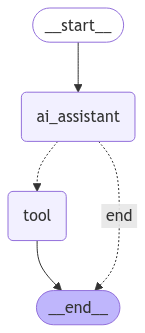

In [ ]:
app

In [ ]:
for s in app.stream({"messages":['who is upcoming president of USA?']}):
    print(list(s.values())[0])
    print('----------------')

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_mprj', 'function': {'arguments': '{"query":"upcoming president of USA"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 1075, 'total_tokens': 1158, 'completion_time': 0.150909091, 'prompt_time': 0.035046177, 'queue_time': 0.021316263000000002, 'total_time': 0.185955268}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ef148afa-d603-4a83-8aa4-6a9b5eb6412c-0', tool_calls=[{'name': 'search', 'args': {'query': 'upcoming president of USA'}, 'id': 'call_mprj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1075, 'output_tokens': 83, 'total_tokens': 1158})]}
----------------
selected tool: search
[y/n] continue with expensive web search?y
{'messages': ["Republican Donald Trump will be the next US president, after he defeated Democrat Kamala Harris in Nov

In [ ]:
for s in app.stream({"messages":['who is upcoming president of USA?']}):
    print(list(s.values())[0])
    print('----------------')

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_9b24', 'function': {'arguments': '{"query":"upcoming president of USA"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 1075, 'total_tokens': 1157, 'completion_time': 0.149090909, 'prompt_time': 0.043805091, 'queue_time': 0.021756558000000002, 'total_time': 0.192896}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c76788af-d59c-4344-9e39-7feb9a52f975-0', tool_calls=[{'name': 'search', 'args': {'query': 'upcoming president of USA'}, 'id': 'call_9b24', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1075, 'output_tokens': 82, 'total_tokens': 1157})]}
----------------
selected tool: search
[y/n] continue with expensive web search?y
{'messages': ["Republican Donald Trump will be the next US president, after he defeated Democrat Kamala Harris in Novemb

In [ ]:
for s in app.stream({"messages":['Multiply 23 and 29']}):
    print(list(s.values())[0])
    print('----------------')

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pjw9', 'function': {'arguments': '{"first_number":23,"second_number":29}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 1076, 'total_tokens': 1167, 'completion_time': 0.165454545, 'prompt_time': 0.059303946, 'queue_time': 0.020859463, 'total_time': 0.224758491}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6792c0d5-fef7-41b6-a95f-90a8ef06cacc-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 23, 'second_number': 29}, 'id': 'call_pjw9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1076, 'output_tokens': 91, 'total_tokens': 1167})]}
----------------
selected tool: multiply
{'messages': [667]}
----------------


In [ ]:
for s in app.stream({"messages":['what is total amount of money on earth?']}):
    print(list(s.values())[0])
    print('----------------')

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4ad3', 'function': {'arguments': '{"query":"total amount of money on earth"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 1077, 'total_tokens': 1162, 'completion_time': 0.154545455, 'prompt_time': 0.059489484, 'queue_time': 0.052803856, 'total_time': 0.214034939}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-53e312d2-3b41-4d47-a9c7-865a2b69534b-0', tool_calls=[{'name': 'search', 'args': {'query': 'total amount of money on earth'}, 'id': 'call_4ad3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1077, 'output_tokens': 85, 'total_tokens': 1162})]}
----------------
selected tool: search
[y/n] continue with expensive web search?y
{'messages': ["The total amount of money in the world can be measured and expressed in many different ways, so it's 

In [ ]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [ ]:
class AgentState(TypedDict):
  messages:Annotated[list, add_messages]

In [ ]:
tools=[search]

In [ ]:
llm_with_tools=llm.bind_tools(tools)

In [ ]:
def ai_assistant(state:AgentState):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [ ]:
memory=MemorySaver()

In [ ]:
graph_builder=StateGraph(AgentState)
graph_builder.add_node("ai_assistant",ai_assistant)
tool_node=ToolNode(tools=tools)
graph_builder.add_node("tools",tool_node)

In [ ]:
graph_builder.add_edge(START,"ai_assistant")
graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools","ai_assistant")

In [ ]:
app2=graph_builder.compile(
    checkpointer=memory,
    interrupt_before=["tools"]
)

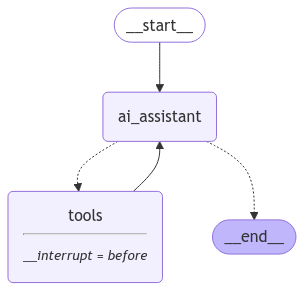

In [ ]:
app2

In [ ]:
user_input = "what is current a capital of india?"
config = {"configurable": {"thread_id": "1"}}

In [ ]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is current a capital of india?
================================== Ai Message ==================================
Tool Calls:
  search (call_wc4y)
 Call ID: call_wc4y
  Args:
    query: what is the capital of india


In [ ]:
snapshot = app2.get_state(config)
snapshot.next

('tools',)

In [ ]:
last_message=snapshot.values["messages"][-1]

In [ ]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'what is the capital of india'},
  'id': 'call_wc4y',
  'type': 'tool_call'}]

In [ ]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  search (call_wc4y)
 Call ID: call_wc4y
  Args:
    query: what is the capital of india
================================= Tool Message =================================
Name: search

New Delhi, national capital of India. It is situated in the north-central part of the country on the west bank of the Yamuna River, adjacent to and just south of Delhi city (Old Delhi) and within the Delhi national capital territory. Learn more about New Delhi in this article. Delhi is a city and national capital territory in north-central India. The city of Delhi actually consists of two components: Old Delhi, in the north, the historic city; and New Delhi, in the south, since 1947 the capital of India, built in the first part of the 20th century as the capital of British India. India, country that occupies the greater part of South Asia.It is made up of 28 states and eight union territories, and its national cap

In [ ]:
user_input = "what is a weather there?"

config = {"configurable": {"thread_id": "1"}}

In [ ]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather there?
================================== Ai Message ==================================
Tool Calls:
  search (call_skcr)
 Call ID: call_skcr
  Args:
    query: weather in New Delhi


In [ ]:
snapshot = app2.get_state(config)
snapshot.next

('tools',)

In [ ]:
last_message=snapshot.values["messages"][-1]
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in New Delhi'},
  'id': 'call_skcr',
  'type': 'tool_call'}]

In [ ]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [ ]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

In [ ]:
app2.get_state(config)

StateSnapshot(values={'messages': [HumanMessage(content='what is current a capital of india?', additional_kwargs={}, response_metadata={}, id='2c804e6c-c9af-4659-b955-c32ba5d7c053'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wc4y', 'function': {'arguments': '{"query":"what is the capital of india"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 947, 'total_tokens': 1031, 'completion_time': 0.152727273, 'prompt_time': 0.038600926, 'queue_time': 0.021952354, 'total_time': 0.191328199}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b9e67cca-2427-456a-86b2-93d18c238777-0', tool_calls=[{'name': 'search', 'args': {'query': 'what is the capital of india'}, 'id': 'call_wc4y', 'type': 'tool_call'}], usage_metadata={'input_tokens': 947, 'output_tokens': 84, 'total_tokens': 1031}), ToolMessage(content="New Delhi, nati

In [ ]:
snapshot=app2.get_state(config)
snapshot.next

('tools',)

In [ ]:
user_input = "give me the recent news of it?"

config = {"configurable": {"thread_id": "1"}}


In [ ]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

snapshot=app2.get_state(config)
current_message = snapshot.values["messages"][-1]
current_message.pretty_print()

================================ Human Message =================================

give me the recent news of it?
================================== Ai Message ==================================
Tool Calls:
  search (call_06nx)
 Call ID: call_06nx
  Args:
    query: recent news New Delhi
================================== Ai Message ==================================
Tool Calls:
  search (call_06nx)
 Call ID: call_06nx
  Args:
    query: recent news New Delhi


In [ ]:
tool_call_id = current_message.tool_calls[0]["id"]
tool_call_id

'call_06nx'

In [ ]:
from langchain_core.messages import AIMessage, ToolMessage
answer = "it is just related to raining which is happing on daily basis"
new_messages = [
    ToolMessage(content=answer, tool_call_id=tool_call_id),
    AIMessage(content=answer),
]

In [ ]:
app2.update_state(
    config,
    {"messages": new_messages},
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efd8974-8cce-6609-800a-1d48324d5643'}}

In [ ]:
print(app2.get_state(config).values["messages"][-1:])

[AIMessage(content='it is just related to raining which is happing on daily basis', additional_kwargs={}, response_metadata={}, id='0c2e49cd-6380-4a01-88fd-1f0927fb6936')]
